In [279]:
import pandas as pd # for data analytics
import numpy as np # for numerical computation

#models
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#analytics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import precision_recall_fscore_support, classification_report,confusion_matrix
from matplotlib import pyplot as plt

In [280]:
data = pd.read_csv("https://raw.githubusercontent.com/renatojmf/Machine-Learning/main/data.csv",encoding = "ISO-8859-1")
data["defects"] = data["defects"].astype(int)
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,0.10,163.15,1,0,6,0,15.0,15.0,44.0,19.0,9.0,0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,0.07,191.55,0,0,3,0,16.0,8.0,31.0,16.0,7.0,0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,0.12,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0,0


In [281]:
#divisão entre dados de treinamento e testes
X = data.drop(['defects'], axis=1)
y = data['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [282]:
k_range = [2,3,4,5,6]
k_scores = []

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=0).fit(X,y)
  scores = cross_val_score(kmeans, X, y, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())

print(k_scores)

[0.8940408163265307, 0.6904489795918367, 0.722, 0.8181224489795916, 0.8021224489795917]


Text(0, 0.5, 'Cross-Validated Accuracy')

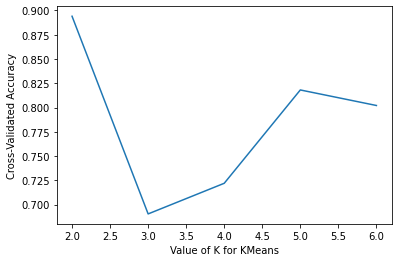

In [283]:
# plotando o valor de K versus a acurácia no cross-validation
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KMeans')
plt.ylabel('Cross-Validated Accuracy')

In [284]:
#gerando o subconjunto para defeitos e sem defeitos
fraud = data.loc[data['defects'] == 1]
fraud =  data.drop(columns='defects')

non_fraud = data.loc[data['defects']== 0]
non_fraud = non_fraud.drop(columns='defects')

In [285]:
#gerando as metaclasses para o agrupamento de defeitos
kmeans = KMeans(n_clusters=2, random_state=0)
predict_true = kmeans.fit_predict(non_fraud)
non_fraud['meta_class'] = predict_true

In [287]:
#gerando as metaclasses para o agrupamento sem defeitos
kmeans = KMeans(n_clusters=2, random_state=0)
predict_false = kmeans.fit_predict(fraud)
fraud['meta_class'] = predict_false

In [288]:
non_fraud['meta_class'] = "f_" + non_fraud['meta_class'].astype(str)
fraud['meta_class'] = "t_" + fraud['meta_class'].astype(str)

In [289]:
df_res = pd.concat([fraud, non_fraud])

df_res = df_res.sample(frac=1, random_state=20)
df_res = df_res.sample(frac=1, random_state=20)
df_res['meta_class'].unique()

array(['t_0', 'f_0', 'f_1', 't_1'], dtype=object)

In [290]:
#função para normalizar os valores no dataset 
def normalizacoes(df, column):
  X = df.drop(columns=[column])
  Y = df[column]

  scaler = StandardScaler().fit_transform(X)
  X = pd.DataFrame(scaler)
  return X, Y

In [291]:
import warnings
warnings.filterwarnings("ignore") 

knn_acc = []
nb_acc  = []
nbk_acc = []

X, Y = normalizacoes(data, "defects")

knn = KNeighborsClassifier(n_neighbors=1)
scores_knn = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
knn_acc.append(scores_knn.mean())

print("1NN acc:",knn_acc[0])

nb_normal = GaussianNB()
scores_nb = cross_val_score(nb_normal, X, Y, cv=10, scoring='accuracy')
nb_acc.append(scores_nb.mean())

print("NB sem KMeans acc:",nb_acc[0])

X, Y = normalizacoes(df_res, "meta_class")    
nb_k = GaussianNB()
scores_nbm = cross_val_score(nb_k, X, Y, cv=10, scoring='accuracy')
nbk_acc.append(scores_nbm.mean())

print("NB com KMeans acc:",nbk_acc[0])

1NN acc: 0.861591836734694
NB sem KMeans acc: 0.8455102040816327
NB com KMeans acc: 0.48789473684210527


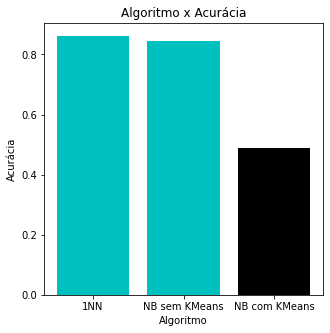

In [292]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.bar("1NN", knn_acc[0]  , color = 'c')
ax.bar("NB sem KMeans", nb_acc[0], color = 'c')
ax.bar("NB com KMeans", nbk_acc[0], color = 'k')
ax.set(xlabel = 'Algoritmo'
       , ylabel = 'Acurácia'
       , title = 'Algoritmo x Acurácia')

plt.show()